Classifying Newswires

AIM : To classify Reuters newswires into 46 different mutually-exclusive topics

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
( train_data, train_labels ), ( test_data, test_labels ) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 10s 5us/step


In [5]:
print(len(train_data))
print(len(test_data))

8982
2246


In [7]:
len(train_data[10])

31

In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])

In [12]:
decoded_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [13]:
#one-hot encoding
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [15]:
x_train[10]

array([0., 1., 0., ..., 0., 0., 0.])

16-dimensional space may be too limited to learn to separate 46 different classes: such
small layers may act as information bottlenecks, permanently dropping relevant
information. For this reason we will use larger layers. Let’s go with 64 units:

In [16]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

softmax activation. It means that the network will output a probability distribution over the
46 different output classes, i.e. for every input sample, the network will produce a
46-dimensional output vector where output[i] is the probability that the sample
belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is categorical_crossentropy. It
measures the distance between two probability distributions: in our case, between the
probability distribution output by our network, and the true distribution of the labels. By
minimizing the distance between these two distributions, we train our network to output
something as close as possible to the true labels.

In [18]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

set apart 1,000 samples in our training data to use as a validation set

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 431us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 268us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 2s 269us/step - loss: 1.0993 - acc: 0.7641 - val_loss: 1.1745 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 269us/step - loss: 0.8729 - acc: 0.8157 - val_loss: 1.0842 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 2s 266us/step - loss: 0.7061 - acc: 0.8492 - val_loss: 0.9869 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 2s 259us/step - loss: 0.5695 - acc: 0.8791 - val_loss: 0.9418 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 273us/step - loss: 0.4625 - acc: 0.9034 - val_loss: 0.9090 - val_acc: 0.8030


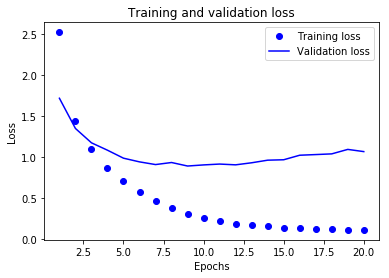

In [23]:
import matplotlib.pyplot as plt
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

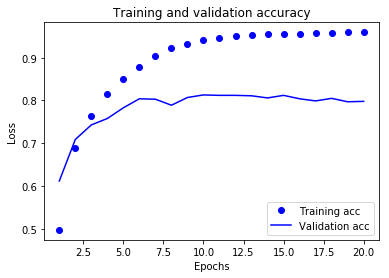

In [22]:
plt.clf() # clear figure
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
#network starts overfitting after 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 345us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 2s 269us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 270us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 2s 269us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0534 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 2s 264us/step - loss: 0.6392 - acc: 0.8627 - val_loss: 0.9751 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 2s 262us/step - loss: 0.5120 - acc: 0.8923 - val_loss: 0.9100 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 2s 261us/step - loss: 0.4115 - acc: 0.9148 - val_loss: 0.8909 - val_acc: 0.8210
Epoch 8

[1.0235360021158084, 0.7751558326443496]

In [25]:
predictions = model.predict(x_test)

In [27]:
predictions[10].shape

(46,)

In [28]:
np.sum(predictions[10])

1.0000001

In [29]:
np.argmax(predictions[0]) # cclass with highest probability

3